**Name:** Muhammad Umer

**Email** umerhayat282@gmail.com

**Date** November 20, 2025

____

# Table of Contents

- [About This Notebook](#about-this-notebook)
- [Task](#task)
- [Load Dataset](#load-dataset)
- [Preprocess Data](#preprocess-data)
    - [Normalize Image Data](#normalize-image-data)
- [Build CNN Model](#build-cnn-model)
    - [Define CNN Model Architecture](#define-cnn-model-architecture)
- [Train Model](#train-model)
- [Evaluate Model](#evaluate-model)



___

## About This Notebook:

This notebook builds, trains, and evaluates a simple Convolutional Neural Network on the CIFAR-10 dataset. It loads CIFAR-10, normalizes images to the 0–1 range, and keeps labels as integers for sparse categorical loss. The CNN is defined with several Conv2D and MaxPooling2D layers, followed by dense layers, compiled with Adam and trained for 10 epochs. Training history (accuracy and loss) is plotted and the model is evaluated on the test set with a confusion matrix and per-class metrics. Conclusions mention model performance and suggest improvements such as data augmentation, regularization, and longer training for better accuracy.

___

# Task
Build, train, and evaluate a Convolutional Neural Network (CNN) model using a dataset like CIFAR-10 or MNIST from `tf.keras.datasets`, and then summarize the model's performance and insights gained about CNNs from this exercise.

## Load Dataset

### Subtask:
Load a suitable image dataset (e.g., CIFAR-10 or MNIST) from `tf.keras.datasets`.


**Reasoning**:
First, I'll import the tensorflow library, which is necessary for loading the dataset.



In [1]:
import tensorflow as tf
print("Tensorflow imported successfully.")

Tensorflow imported successfully.


**Reasoning**:
Now that TensorFlow is imported, I will load the CIFAR-10 dataset using `tf.keras.datasets.cifar10.load_data()` and assign the data to `train_images`, `train_labels`, `test_images`, and `test_labels` as instructed.



In [2]:
import tensorflow as tf

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

print(f"Shape of train_images: {train_images.shape}")
print(f"Shape of train_labels: {train_labels.shape}")
print(f"Shape of test_images: {test_images.shape}")
print(f"Shape of test_labels: {test_labels.shape}")
print("CIFAR-10 dataset loaded successfully.")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Shape of train_images: (50000, 32, 32, 3)
Shape of train_labels: (50000, 1)
Shape of test_images: (10000, 32, 32, 3)
Shape of test_labels: (10000, 1)
CIFAR-10 dataset loaded successfully.


## Preprocess Data

### Subtask:
Normalize the image data (e.g., scale pixel values to 0-1) and prepare the labels (e.g., one-hot encode if necessary) for the CNN model.


### Normalize Image Data

**Reasoning:** Normalizing image data to a 0-1 range helps neural networks train more effectively by ensuring all pixel values contribute equally and preventing large pixel values from dominating the loss function. It also helps in faster convergence.

**Reasoning**:
Now, I will normalize the pixel values of `train_images` and `test_images` from the range 0-255 to 0-1 by dividing by 255.0. This is a standard practice for image preprocessing in deep learning, and I will then verify the normalization by checking the data types and the minimum and maximum pixel values of the normalized arrays. I will also check the label format for suitability with the model.



In [3]:
train_images_normalized = train_images / 255.0
test_images_normalized = test_images / 255.0

print("--- After Normalization ---")
print(f"Data type of train_images_normalized: {train_images_normalized.dtype}")
print(f"Min pixel value in train_images_normalized: {train_images_normalized.min()}")
print(f"Max pixel value in train_images_normalized: {train_images_normalized.max()}\n")

print(f"Data type of test_images_normalized: {test_images_normalized.dtype}")
print(f"Min pixel value in test_images_normalized: {test_images_normalized.min()}")
print(f"Max pixel value in test_images_normalized: {test_images_normalized.max()}\n")

print(f"Shape of train_labels: {train_labels.shape}, Data type: {train_labels.dtype}")
print(f"Shape of test_labels: {test_labels.shape}, Data type: {test_labels.dtype}")
print("Labels are already in integer format, suitable for sparse_categorical_crossentropy.")

--- After Normalization ---
Data type of train_images_normalized: float64
Min pixel value in train_images_normalized: 0.0
Max pixel value in train_images_normalized: 1.0

Data type of test_images_normalized: float64
Min pixel value in test_images_normalized: 0.0
Max pixel value in test_images_normalized: 1.0

Shape of train_labels: (50000, 1), Data type: uint8
Shape of test_labels: (10000, 1), Data type: uint8
Labels are already in integer format, suitable for sparse_categorical_crossentropy.


## Build CNN Model

### Subtask:
Define a Convolutional Neural Network (CNN) architecture using tf.keras.models.Sequential, including convolutional layers, pooling layers, and dense layers.


### Define CNN Model Architecture

**Reasoning:** Building a Convolutional Neural Network (CNN) involves stacking various types of layers, each serving a specific purpose. Convolutional layers extract features from the input images, while pooling layers reduce spatial dimensions and help in making the model more robust to variations. A `Flatten` layer is used to convert the 2D feature maps into a 1D vector suitable for the fully connected (dense) layers. Finally, dense layers perform classification based on the extracted features. The output layer uses a 'softmax' activation for multi-class classification, providing probabilities for each class.

**Reasoning**:
I will now define the CNN model architecture using `tf.keras.models.Sequential` by adding convolutional, pooling, flatten, and dense layers as per the instructions, and then display its summary to verify the structure.



In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax') # 10 classes for CIFAR-10
])

# Print the model summary
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

**Reasoning**:
After successfully defining the CNN model architecture, the next step is to compile the model. This involves specifying the optimizer, loss function, and metrics that the model will use during training. For CIFAR-10, 'adam' is a suitable optimizer, 'sparse_categorical_crossentropy' is appropriate for integer labels, and 'accuracy' is a standard metric.



In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print("Model compiled successfully with Adam optimizer, sparse_categorical_crossentropy loss, and accuracy metric.")

Model compiled successfully with Adam optimizer, sparse_categorical_crossentropy loss, and accuracy metric.


## Train Model

### Subtask:
Train the compiled CNN model using the preprocessed training data and labels for a specified number of epochs. Also, plot the training history (accuracy and loss) to visualize the model's learning progress.


**Reasoning**:
I will train the previously defined and compiled CNN model using the normalized training data and labels, while also utilizing the normalized test data and labels for validation. I will set the number of epochs to 10 and store the training history in a variable named `history` for subsequent plotting.



In [6]:
history = model.fit(train_images_normalized, train_labels, epochs=10,
                    validation_data=(test_images_normalized, test_labels))
print("Model training completed.")

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 46ms/step - accuracy: 0.3476 - loss: 1.7615 - val_accuracy: 0.5369 - val_loss: 1.2723
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 45ms/step - accuracy: 0.5733 - loss: 1.2106 - val_accuracy: 0.6120 - val_loss: 1.1125
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 45ms/step - accuracy: 0.6347 - loss: 1.0407 - val_accuracy: 0.6453 - val_loss: 1.0083
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 45ms/step - accuracy: 0.6723 - loss: 0.9313 - val_accuracy: 0.6618 - val_loss: 0.9677
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 45ms/step - accuracy: 0.7016 - loss: 0.8500 - val_accuracy: 0.6837 - val_loss: 0.9052
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 45ms/step - accuracy: 0.7246 - loss: 0.7859 - val_accuracy: 0.6767 - val_loss: 0.9480
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 45ms/step - accuracy: 0.7451 - loss: 0.7368 - val_accuracy: 0.6806 - val_loss: 0.9257
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 45ms/step - accuracy: 0.7544 -

## Evaluate Model

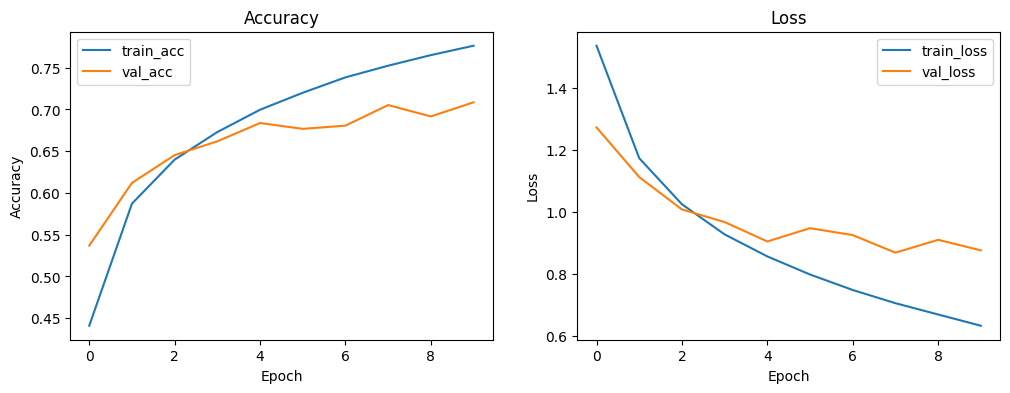

313/313 - 9s - 28ms/step - accuracy: 0.7085 - loss: 0.8767
Test loss: 0.8767, Test accuracy: 0.7085
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step


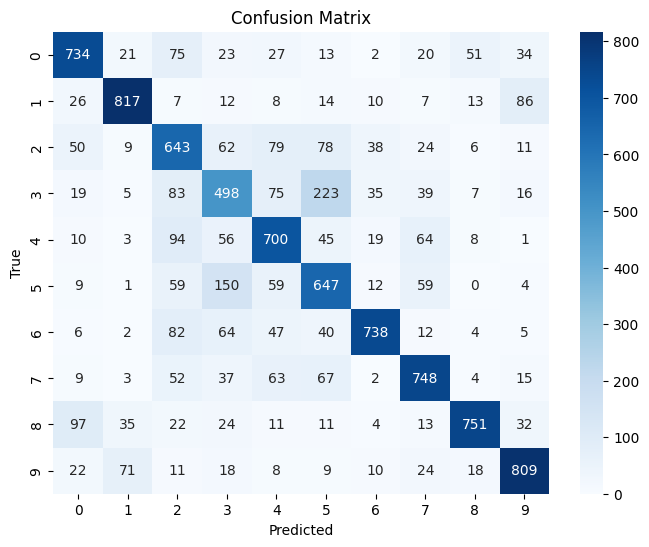

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.73      0.74      1000
           1       0.84      0.82      0.83      1000
           2       0.57      0.64      0.60      1000
           3       0.53      0.50      0.51      1000
           4       0.65      0.70      0.67      1000
           5       0.56      0.65      0.60      1000
           6       0.85      0.74      0.79      1000
           7       0.74      0.75      0.74      1000
           8       0.87      0.75      0.81      1000
           9       0.80      0.81      0.80      1000

    accuracy                           0.71     10000
   macro avg       0.72      0.71      0.71     10000
weighted avg       0.72      0.71      0.71     10000



In [7]:
# Evaluate model on test set and plot history, confusion matrix, classification report
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# 1) Plot training & validation accuracy and loss
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history.get('accuracy', []), label='train_acc')
plt.plot(history.history.get('val_accuracy', []), label='val_acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history.get('loss', []), label='train_loss')
plt.plot(history.history.get('val_loss', []), label='val_loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 2) Evaluate on test data
test_loss, test_acc = model.evaluate(test_images_normalized, test_labels, verbose=2)
print(f"Test loss: {test_loss:.4f}, Test accuracy: {test_acc:.4f}")

# 3) Predictions and confusion matrix / classification report
y_pred_probs = model.predict(test_images_normalized)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = test_labels.flatten()

try:
    from sklearn.metrics import confusion_matrix, classification_report
    import seaborn as sns

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    print('Classification Report:')
    print(classification_report(y_true, y_pred))
except Exception as e:
    # Fallback: use TF confusion matrix and a simple text summary
    print('sklearn not available or error occurred:', e)
    cm = tf.math.confusion_matrix(y_true, y_pred).numpy()
    plt.figure(figsize=(8,6))
    plt.imshow(cm, interpolation='nearest', cmap='Blues')
    plt.title('Confusion Matrix (tf)')
    plt.colorbar()
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # Simple per-class precision/recall using counts
    per_class_true = cm.sum(axis=1)
    per_class_pred = cm.sum(axis=0)
    tp = np.diag(cm)
    precision = np.divide(tp, per_class_pred, out=np.zeros_like(tp, dtype=float), where=per_class_pred!=0)
    recall = np.divide(tp, per_class_true, out=np.zeros_like(tp, dtype=float), where=per_class_true!=0)
    for i, (p, r) in enumerate(zip(precision, recall)):
        print(f"Class {i}: precision={p:.3f}, recall={r:.3f}")